#Spam csv

In [1]:
import pandas as pd
!pip install openpyxl

In [2]:
df =pd.read_excel("Spam_1.xlsx")

In [3]:
df.head()

,"v1,v2,,,"
0,"ham,""Go until jurong point, crazy.. Available ..."
1,"ham,Ok lar... Joking wif u oni...,,,"
2,"spam,Free entry in 2 a wkly comp to win FA Cup..."
3,"ham,U dun say so early hor... U c already then..."
4,"ham,""Nah I don't think he goes to usf, he live..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   v1,v2,,,  5574 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [5]:
df.columns = ['text']

In [6]:
df.head()

,text
0,"ham,""Go until jurong point, crazy.. Available ..."
1,"ham,Ok lar... Joking wif u oni...,,,"
2,"spam,Free entry in 2 a wkly comp to win FA Cup..."
3,"ham,U dun say so early hor... U c already then..."
4,"ham,""Nah I don't think he goes to usf, he live..."


In [7]:
df[["label", "Message"]] = df["text"].str.split(',', n=1, expand=True)

In [8]:
df.head()

,text,label,Message
0,"ham,""Go until jurong point, crazy.. Available ...",ham,"""Go until jurong point, crazy.. Available only..."
1,"ham,Ok lar... Joking wif u oni...,,,",ham,"Ok lar... Joking wif u oni...,,,"
2,"spam,Free entry in 2 a wkly comp to win FA Cup...",spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,"ham,U dun say so early hor... U c already then...",ham,U dun say so early hor... U c already then say...
4,"ham,""Nah I don't think he goes to usf, he live...",ham,"""Nah I don't think he goes to usf, he lives ar..."


In [9]:
df.iloc[[95]]

,text,label,Message
95,"spam,""Your free ringtone is waiting to be coll...",spam,"""Your free ringtone is waiting to be collected..."


In [10]:
df.head()

,text,label,Message
0,"ham,""Go until jurong point, crazy.. Available ...",ham,"""Go until jurong point, crazy.. Available only..."
1,"ham,Ok lar... Joking wif u oni...,,,",ham,"Ok lar... Joking wif u oni...,,,"
2,"spam,Free entry in 2 a wkly comp to win FA Cup...",spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,"ham,U dun say so early hor... U c already then...",ham,U dun say so early hor... U c already then say...
4,"ham,""Nah I don't think he goes to usf, he live...",ham,"""Nah I don't think he goes to usf, he lives ar..."


In [11]:
df.drop(columns=['text'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.head()

,label,Message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,"Ok lar... Joking wif u oni...,,,"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."


In [14]:
df["label"].value_counts()


,count
label,
ham,4825
spam,747
"ham""""""",2


In [15]:
print(type(df["Message"]))

<class 'pandas.core.series.Series'>


In [16]:
print(df.columns)

Index(['label', 'Message'], dtype='object')


In [17]:
!pip install nltk

In [18]:
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Transformation

# A: lowercase all the data in review column
#df['Message'] = df['Message'].str.lower()

def lower_case(df, column_name):
    df[column_name] = df[column_name].str.lower()
    return df

# B: Remove all punctuation
#punc = list(string.punctuation)
#df['Message'] = df['Message'].apply(lambda x: "".join(char for char in x if char not in punc))

def remove_punc(df, column_name):
    punc = set(string.punctuation)
    df[column_name] = df[column_name].apply(lambda x: "".join(char for char in x if char not in punc))
    return df


# C: Remove all space
#df['Message'] = df['Message'].apply(lambda x: " ".join(x.split()))

def remove_space(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: " ".join(x.split()))
    return df

# D: Text normalization include: create tokens, remove stopwords, lemmatize tokens, and remove single letter tokens
#english_stop_words = stopwords.words("english")
#lemmatizer = WordNetLemmatizer()
#df['Message'] = df['Message'].apply(lambda x: [word for word in word_tokenize(str(x)) if word not in english_stop_words and len(word) > 1])
#df['Message'] = df['Message'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x if len(lemmatizer.lemmatize(word)) > 1))

def text_normalization(df, column_name):
  english_stop_words = stopwords.words("english")
  lemmatizer = WordNetLemmatizer()
  df[column_name] = df[column_name].apply(lambda x: [word for word in word_tokenize(str(x)) if word not in english_stop_words and len(word) > 1])
  df[column_name] = df[column_name].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x if len(lemmatizer.lemmatize(word)) > 1))
  return df

# E: Encoding the column "Label"
#le = LabelEncoder()
#df['label'] = le.fit_transform(df['label'])

def encoding(df, column_name):
  le = LabelEncoder()
  df[column_name] = le.fit_transform(df[column_name])
  return df


# F: Apply tf-idf
#tfidf_vectorizer = TfidfVectorizer(max_features=100000)
#X = tfidf_vectorizer.fit_transform(df["Message"])
#y = df["label"]

def tfidf(df, column_name):
  tfidf_vectorizer = TfidfVectorizer(max_features=21000)
  X = tfidf_vectorizer.fit_transform(df[column_name])
  y = df["label"]
  return X, y, tfidf_vectorizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [19]:
print(df.head())


df = lower_case(df, column_name="Message")
print(df.head())
print("\n")

df = remove_punc(df, column_name="Message")
df=remove_punc(df,column_name="label")
print(df.head())
print(df["label"].value_counts())
print("\n")
df = remove_space(df, column_name="Message")
print(df.head())
print("\n")
df = text_normalization(df, column_name="Message")
print(df.head())
print("\n")
df = encoding(df, column_name="label")
print(df.head())
print("\n")
X,y,tfidf_vectorizer = tfidf(df, column_name="Message")
print(X.shape)
print(y[:5])


  label                                            Message
0   ham  "Go until jurong point, crazy.. Available only...
1   ham                   Ok lar... Joking wif u oni...,,,
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  "Nah I don't think he goes to usf, he lives ar...
  label                                            Message
0   ham  "go until jurong point, crazy.. available only...
1   ham                   ok lar... joking wif u oni...,,,
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  "nah i don't think he goes to usf, he lives ar...


  label                                            Message
0   ham  go until jurong point crazy available only in ...
1   ham                            ok lar joking wif u oni
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham        u dun say so early hor u c already then

In [20]:
print(tfidf_vectorizer.get_feature_names_out()[:50])

['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089' '02072069400' '02073162414'
 '02085076972' '020903' '021' '050703' '0578' '06' '060505' '061104'
 '07008009200' '07046744435' '07090201529' '07090298926' '07099833605'
 '071104' '07123456789' '0721072' '07732584351' '07734396839'
 '07742676969' '07753741225' '0776xxxxxxx' '07786200117' '077xxx' '078'
 '07801543489' '07808' '07808247860' '07808726822' '07815296484'
 '07821230901' '0784987' '0789xxxxxxx' '0794674629107880867867'
 '0796xxxxxx' '07973788240' '07xxxxxxxxx' '0800' '08000407165']


Training and tuning RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Training and tuning MultinomialNB...
Best parameters for MultinomialNB: {'alpha': 0.5}

Training and tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 10.0, 'solver': 'lbfgs'}


Final Results After Hyperparameter Tuning:

                    Model  Accuracy  Precision    Recall  F1-Score
0  RandomForestClassifier  0.978475   0.979004  0.978475  0.977742
1           MultinomialNB  0.979372   0.979663  0.979372  0.978765
2      LogisticRegression  0.973094   0.972696  0.973094  0.972581


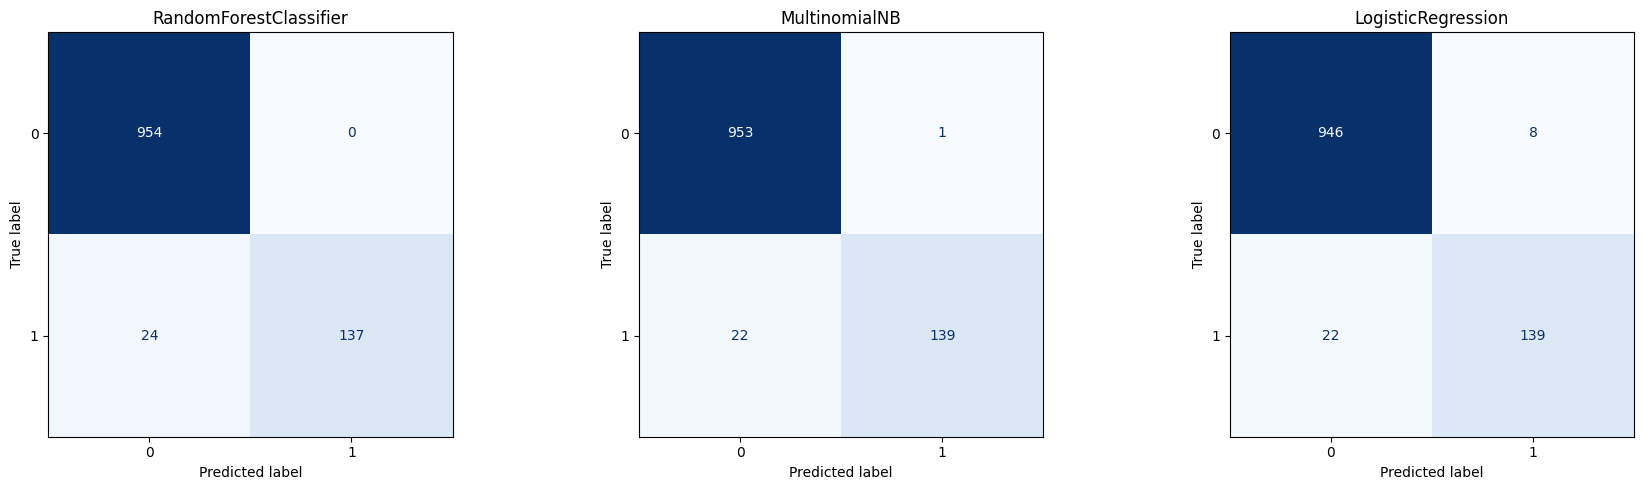

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# G: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# H: Model Training
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Hyperparameter Tuning:
param_grids = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "MultinomialNB": {
        "alpha": [0.5, 1.0, 1.5]
    },
    "LogisticRegression": {
        "C": [0.1, 1.0, 10.0],
        "solver": ["lbfgs","liblinear"]
    }
}

fitted_models = {}
for name, model in models.items():
    print(f"Training and tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5)
    grid.fit(X_train, y_train)
    fitted_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}\n")


# I: Evaluate Models
results = []
predictions = {}

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    predictions[name]= y_pred
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

df_results = pd.DataFrame(results)
print("\nFinal Results After Hyperparameter Tuning:\n")
print(df_results)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust layout for 3 models

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

In [22]:
# Hybrid voting

fitted_models_list = list(fitted_models.values())
print(fitted_models_list)

[RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42), MultinomialNB(alpha=0.5), LogisticRegression(C=10.0, max_iter=1000)]


In [23]:
X_test.shape

(1115, 8943)

In [24]:
print(type(X_test))


<class 'scipy.sparse._csr.csr_matrix'>


In [25]:
pred1 = fitted_models_list[0].predict(X_test)
pred2 = fitted_models_list[1].predict(X_test)
pred3 = fitted_models_list[2].predict(X_test)

In [26]:
print(type(pred1))

<class 'numpy.ndarray'>


In [27]:
import numpy as np
X_forth = np.column_stack((pred1, pred2, pred3))

In [28]:
print(X_forth.shape)

(1115, 3)


In [29]:
new_table=pd.DataFrame(X_forth)
print(new_table)

      0  1  2
0     0  0  0
1     0  0  0
2     0  0  0
3     0  0  0
4     0  0  0
...  .. .. ..
1110  0  0  0
1111  1  1  1
1112  0  0  0
1113  0  0  0
1114  1  1  1

[1115 rows x 3 columns]


In [30]:
new_table.columns = ["pred1", "pred2", "pred3"]

In [31]:
new_table

,pred1,pred2,pred3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1110,0,0,0
1111,1,1,1
1112,0,0,0
1113,0,0,0


In [32]:
new_table["model4"] = new_table[["pred1", "pred2", "pred3"]].apply(lambda x : 1 if x.sum() > 2 else 0,axis=1)

In [33]:
new_table

,pred1,pred2,pred3,model4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1110,0,0,0,0
1111,1,1,1,1
1112,0,0,0,0
1113,0,0,0,0


In [34]:
new_table["model4"].value_counts()

,count
model4,
0,985
1,130


In [35]:
from sklearn.metrics import f1_score
f1_score(y_test,new_table["model4"])

0.8934707903780069

In [36]:
f1_score(pred1,new_table["model4"])

0.9737827715355806

In [37]:
f1_score(y_test,pred2)

0.9235880398671097

In [38]:
f1_score(y_test,pred3)

0.9025974025974026

# Spam_emails

In [39]:
import re

# Load the raw file (adjust filename if needed)

import pandas as pd
import csv

# Read the raw CSV file with many empty columns
with open("spam_Emails_data.csv", "r", encoding="ISO-8859-1") as f:
    reader = csv.reader(f)
    data = list(reader)

# Extract rows where the first two columns are label and text
rows = []
for row in data:
    if row and row[0] in ["Spam", "Ham"]:
        label = row[0]
        # The second column may contain the message (could be multiline or quoted)
        text = row[1]
        rows.append([label, text.strip()])

# Create a DataFrame
df = pd.DataFrame(rows, columns=["label", "text"])

# Optional: Remove newline characters, excessive spaces, or quotes from text
df["text"] = df["text"].str.replace("\n", " ").str.strip('" ')

# Save cleaned CSV
df.to_csv("cleaned_dataset.csv", index=False)



In [40]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,label,text
0,Spam,viiiiiiagraaaa only for the ones that want to ...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [41]:
df["label"].value_counts()

,count
label,
Ham,102155
Spam,91690


In [42]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Separate Spam and Ham
spam_df = df[df['label'] == 'Spam']
ham_df = df[df['label'] == 'Ham']

# Undersample Ham to match Spam count
ham_sampled = ham_df.sample(n=len(spam_df), random_state=42)

# Combine balanced data
balanced_df = pd.concat([spam_df, ham_sampled])

# Shuffle the dataset (important!)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to new CSV
balanced_df.to_csv("balanced_dataset.csv", index=False)

# Optional: Show counts
print(balanced_df['label'].value_counts())

label
Ham     91690
Spam    91690
Name: count, dtype: int64


In [43]:
balanced_df["label"].value_counts()

,count
label,
Ham,91690
Spam,91690


In [44]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183380 entries, 0 to 183379
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   183380 non-null  object
 1   text    183378 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [45]:
(balanced_df["text"].isnull()).sum()

np.int64(2)

In [46]:
balanced_df.dropna(inplace=True)


In [47]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183378 entries, 0 to 183379
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   183378 non-null  object
 1   text    183378 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


In [48]:
balanced_df.rename(columns={"text": "Message"}, inplace=True)


In [49]:
balanced_df.head()

,label,Message
0,Ham,latest original message from sheryl d lara dyn...
1,Ham,start date : 2 / 3 / 02 ; hourahead hour : 16 ...
2,Ham,chromatic wrote on monday escapenumber april e...
3,Spam,the oil and gas advisory now that oil and gas ...
4,Ham,upon receipt of a notice to exercise rofr you ...


In [50]:
df = balanced_df.copy()

df = lower_case(df, column_name="Message")
print(df.head())
print("\n")

df = remove_punc(df, column_name="Message")
df=remove_punc(df,column_name="label")
print(df.head())
print(df["label"].value_counts())
print("\n")
df = remove_space(df, column_name="Message")
print(df.head())
print("\n")
df = text_normalization(df, column_name="Message")
print(df.head())
print("\n")
df = encoding(df, column_name="label")
print(df.head())
print("\n")
X,y,tfidf_vectorizer = tfidf(df, column_name="Message")
print(X.shape)
print(y[:5])

  label                                            Message
0   Ham  latest original message from sheryl d lara dyn...
1   Ham  start date : 2 / 3 / 02 ; hourahead hour : 16 ...
2   Ham  chromatic wrote on monday escapenumber april e...
3  Spam  the oil and gas advisory now that oil and gas ...
4   Ham  upon receipt of a notice to exercise rofr you ...


  label                                            Message
0   Ham  latest original message from sheryl d lara dyn...
1   Ham  start date  2  3  02  hourahead hour  16  no a...
2   Ham  chromatic wrote on monday escapenumber april e...
3  Spam  the oil and gas advisory now that oil and gas ...
4   Ham  upon receipt of a notice to exercise rofr you ...
label
Ham     91689
Spam    91689
Name: count, dtype: int64


  label                                            Message
0   Ham  latest original message from sheryl d lara dyn...
1   Ham  start date 2 3 02 hourahead hour 16 no ancilla...
2   Ham  chromatic wrote on monday escapenumber apr

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# G: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# H: Model Training
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Hyperparameter Tuning:
param_grids = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "MultinomialNB": {
        "alpha": [0.5, 1.0, 1.5]
    },
    "LogisticRegression": {
        "C": [0.1, 1.0, 10.0],
        "solver": ["lbfgs","liblinear"]
    }
}

fitted_models = {}
for name, model in models.items():
    print(f"Training and tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5)
    grid.fit(X_train, y_train)
    fitted_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}\n")


# I: Evaluate Models
results = []
predictions = {}

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    predictions[name]= y_pred
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

df_results = pd.DataFrame(results)
print("\nFinal Results After Hyperparameter Tuning:\n")
print(df_results)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust layout for 3 models

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

Training and tuning RandomForestClassifier...


In [ ]:
!pip install pickle

In [ ]:
import pickle
import os
from pathlib import Path

def save_models(fitted_models, vectorizer, save_dir="models"):
    """
    Saves trained models and a vectorizer to disk as .pkl files.

    Args:
        fitted_models (dict): Dictionary with model names as keys and trained model instances as values.
        vectorizer: Fitted vectorizer (e.g., TfidfVectorizer or CountVectorizer).
        save_dir (str): Directory to save the models and vectorizer (default: "models").
    """
    # Create the save directory if it doesn't exist
    save_path = Path(save_dir)
    save_path.mkdir(parents=True, exist_ok=True)

    # Save each model
    for model_name, model in fitted_models.items():
        model_file = save_path / f"{model_name}.pkl"
        with open(model_file, "wb") as f:
            pickle.dump(model, f)
        print(f"Saved model: {model_file}")

    # Save the vectorizer
    vectorizer_file = save_path / "tfidf_vectorizer.pkl"
    with open(vectorizer_file, "wb") as f:
        pickle.dump(vectorizer, f)
    print(f"Saved vectorizer: {vectorizer_file}")


In [ ]:
save_models(fitted_models, tfidf_vectorizer, save_dir="my_saved_models")
